In [2]:
#Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Library Import
from sklearn.datasets import make_blobs

import os
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

from keras.models import Sequential,Model
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import torch
import torch.nn as nn 

*`•`* Task 1: Implement data load 
function for fixed length (10 points)

In [4]:
data=pd.read_csv('/content/drive/MyDrive/21-2빅데이터보안/train.csv')
datas=pd.DataFrame(data.iloc[:,0:])
data.columns=list(data.iloc[:,0:].columns)
datas['class']=data['class']
data_drop=datas.drop('class',axis=1)

Xf=data_drop.values
Yf=datas['class'] #.map({'M":1, "B":0})

print(Xf)
print('\n\n')
print(Yf)

[[-1. -1. -1. ... -1. 40. 24.]
 [-1. -1.  1. ... -1. -1. -1.]
 [-1. -1.  1. ... -1. -1. -1.]
 ...
 [ 1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]



0       0
1       0
2       0
3       0
4       0
       ..
6386    1
6387    1
6388    1
6389    1
6390    1
Name: class, Length: 6391, dtype: int64


* Task 2: Implement data load function for variable length (25 points)

In [5]:
import glob
file_list = sorted(glob.glob('/content/drive/MyDrive/21-2빅데이터보안/data/*.csv'))

#'Malicious:1' 150 files, 'Benign:0' 150 files
print(len(file_list))

300


In [6]:
path = '/content/drive/MyDrive/21-2빅데이터보안/data'

#Add a list of file names to file_label
file_list = os.listdir(path)
file_labels = [file for file in file_list]
print(len(file_labels))

300


In [7]:
#Add a label for files to Y
#Malicious:1, Benign:0
Y = []

for i in range(300):
  if file_list[i].startswith('0'):
    Y.append(0)
  else:
    Y.append(1)

In [8]:
print(Y)
print(len(Y))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
300


In [9]:
#Add a file data to files
#Receive files as 2D, convert it back into 1D, and add it to the files array.
files = []

for i in range(300):
    a = pd.read_csv(path+'/'+file_labels[i], encoding='cp1252')
    a_2d = a.to_numpy()
    a_1d = a_2d.flatten()
    files.append(a_1d)

In [10]:
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K

#Padding -1 based on the length of the longest file
padded_files = pad_sequences(files, value=-1)

print(padded_files)
padded_files.shape

[[-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]
 ...
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]]


(300, 799236)

In [11]:
X = np.array(padded_files)
Y = np.array(Y)

print(X.shape)
print(Y.shape)

(300, 799236)
(300,)


• Task 3: Implement K-means clustering or any ML algorithms (25 points)


In [12]:
#data with Fixed length
x_trainF, x_testF, y_trainF, y_testF = train_test_split(Xf, Yf, test_size = 0.1)

#K-Means Clustering
k_means=KMeans(n_clusters=2)
k_means.fit(x_trainF)
predictK=k_means.predict(x_testF)
scoreK=accuracy_score(y_testF, predictK)
print('k_means clustering prediction score: %s' % scoreK)

#SVM 
clfSVC=Sequential()
clfSVC=SVC(gamma='auto')
clfSVC.fit(x_trainF, y_trainF)
predictSVC = clfSVC.predict(x_testF)
scoreSVC = accuracy_score(y_testF, predictSVC)
print('svm prediction score: %s' % scoreSVC)

#Logistic Regression
clfLog=Sequential()
clfLog=LogisticRegression()
clfLog.fit(x_trainF, y_trainF)
predictLog = clfLog.predict(x_testF)
scoreLog = accuracy_score(y_testF, predictLog)
print('LogisticRegression prediction score: %s' % scoreLog)

#RandomForest Classifier
clfRdf=Sequential()
clfRdf=RandomForestClassifier()
clfRdf.fit(x_trainF, y_trainF)
predictRdf = clfRdf.predict(x_testF)
scoreRdf = accuracy_score(y_testF, predictRdf)
print('RandomForestClassifier prediction score: %s' % scoreRdf)


k_means clustering prediction score: 0.61875
svm prediction score: 0.9046875
LogisticRegression prediction score: 0.9859375
RandomForestClassifier prediction score: 0.9921875


In [14]:
#data with Variable length
x_trainV, x_testV, y_trainV, y_testV = train_test_split(X, Y, test_size = 0.1)

#K-Means Clustering
k_means=KMeans(n_clusters=2)
k_means.fit(x_trainV)
predictK=k_means.predict(x_testV)
scoreK=accuracy_score(y_testV, predictK)
print('k_means clustering prediction score: %s' % scoreK)

#SVM
clfSVC2=Sequential()
clfSVC2=SVC(gamma='auto')
clfSVC2.fit(x_trainV, y_trainV)
predictSVC2 = clfSVC2.predict(x_testV)
scoreSVC2 = accuracy_score(y_testV, predictSVC2)
print('svm prediction score: %s' % scoreSVC2)

#Logistic Regression
clfLog2=Sequential()
clfLog2=LogisticRegression()
clfLog2.fit(x_trainV, y_trainV)
predictLog2 = clfLog2.predict(x_testV)
scoreLog2 = accuracy_score(y_testV, predictLog2)
print('LogisticRegression prediction score: %s' % scoreLog2)

#RandomForest Classifier
clfRdf2=Sequential()
clfRdf2=RandomForestClassifier()
clfRdf2.fit(x_trainV, y_trainV)
predictRdf2 = clfRdf2.predict(x_testV)
scoreRdf2 = accuracy_score(y_testV, predictRdf2)
print('RandomForestClassifier prediction score: %s' % scoreRdf2)

k_means clustering prediction score: 0.26666666666666666
svm prediction score: 0.9333333333333333
LogisticRegression prediction score: 0.9666666666666667
RandomForestClassifier prediction score: 0.9666666666666667


• Task 4: Visualize clustering or hidden representation of ML algorithm results (20 points)

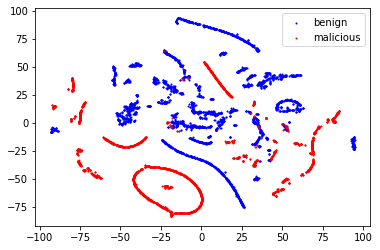

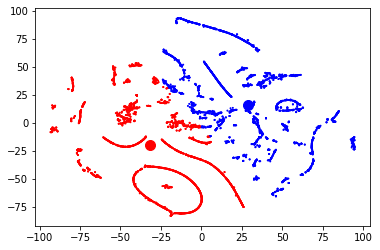

In [44]:
#data with Fixed length
#TSNE
tsne = TSNE(n_components=2)
Xf_2d=tsne.fit_transform(Xf)
for i,c,l in zip([0,1],['b','r'],['benign','malicious']):
  plt.scatter(Xf_2d[Yf==i,0],Xf_2d[Yf==i,1],c=c,label=l,s=1)
  #Convert x value with (Y==0) to x, y value with (Y==0) to y
  #Convert x value with (Y==1) to x, y value with (Y==1) to y

plt.legend()
plt.show()

#data with Fixed length
#K-Means Clustering
dataK=pd.DataFrame.copy(data)
Xf_2d2=Xf_2d

dataK['cluster'] = k_means.fit_predict(Xf_2d2)

plt.scatter(Xf_2d2[:,0], Xf_2d2[:,1], c=dataK.cluster.map({0:'b', 1:'r'}),s=1)
plt.scatter(k_means.cluster_centers_[0, 0], k_means.cluster_centers_[0, 1], s=100, c='b')
plt.scatter(k_means.cluster_centers_[1, 0], k_means.cluster_centers_[1, 1], s=100, c='r')

plt.show()

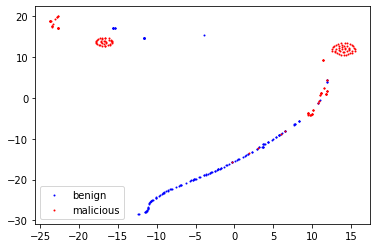

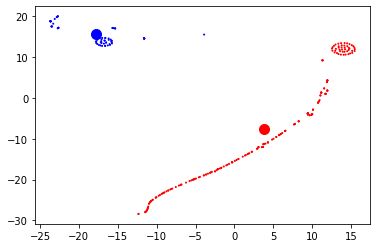

In [47]:
#data with Variable length
#TSNE
tsne = TSNE(n_components=2)
X_2d2=tsne.fit_transform(X)
for i,c,l in zip([0,1],['b','r'],['benign','malicious']):
  plt.scatter(X_2d2[Y==i,0],X_2d2[Y==i,1],c=c,label=l,s=1)
  #Convert x value with (Y==0) to x, y value with (Y==0) to y
  #Convert x value with (Y==1) to x, y value with (Y==1) to y

plt.legend()
plt.show()

#data with Variable length
#K-Means Clustering
data_df = pd.DataFrame(padded_files) 
dataK2=pd.DataFrame.copy(data_df)
X_2dd2=X_2d2

dataK2['cluster'] = k_means.fit_predict(X_2dd2)

plt.scatter(X_2dd2[:,0], X_2dd2[:,1], c=dataK2.cluster.map({0:'b', 1:'r'}),s=1)
plt.scatter(k_means.cluster_centers_[0, 0], k_means.cluster_centers_[0, 1], s=100, c='b')
plt.scatter(k_means.cluster_centers_[1, 0], k_means.cluster_centers_[1, 1], s=100, c='r')

plt.show()